# Iterating through all patients in all years to find peep>5

In [1]:
import pandas as pd
from datetime import datetime
import os
import pickle
from datetime import timedelta
from datetime import datetime
from datetime import date
from datetime import time
from dateutil.relativedelta import relativedelta

import sys
from scipy.io import loadmat

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
matplotlib.rc( 'savefig', facecolor = 'white' )
from matplotlib import pyplot
import matplotlib.ticker as plticker

In [2]:
%pwd

'/labs/kamaleswaranlab/Sepsis3_062321/mchan_analysis/disparities_O2/repo/stage1_PPG_analysis'

# get PPG data

In [6]:
# for sub_file in os.listdir(inputdir):
#     print(sub_file)

In [7]:
import os

homedir = os.path.expanduser('~')+'/'

inputdir = homedir+'kamaleswaranlab/Sepsis3_062321/Files_cp_sftp_6_30_21/Files_cp_6_30_21/'

for sub_file in os.listdir(inputdir):
    # print(sub_file)
    pass

# sub_id = 'A058-0502749430'
sub_id = 'A097-0427935662'


for sub_file in os.listdir(inputdir+sub_id):
    if 'hea' in sub_file:
        print(sub_file)

inputdir_sub = inputdir + sub_id + '/'

inputdir_sub



header_name = sub_id+'_0000.hea'

headerdir = inputdir_sub+header_name

headerdir

with open(headerdir, 'r') as f:
    header = f.readlines()


A097-0427935662_0000.hea
A097-0427935662_0001.hea
A097-0427935662_0002.hea
A097-0427935662_0003.hea
A097-0427935662_0004.hea
A097-0427935662_0005.hea
A097-0427935662_0006.hea
A097-0427935662_0007.hea
A097-0427935662_0008.hea
A097-0427935662_0009.hea
A097-0427935662_0010.hea
A097-0427935662_0011.hea
A097-0427935662_0012.hea
A097-0427935662_0013.hea
A097-0427935662_0014.hea
A097-0427935662_0015.hea
A097-0427935662_0016.hea
A097-0427935662_0017.hea
A097-0427935662_0018.hea
A097-0427935662_0019.hea
A097-0427935662_0020.hea
A097-0427935662_0021.hea
A097-0427935662_0022.hea
A097-0427935662_0023.hea
A097-0427935662_0024.hea
A097-0427935662_0025.hea
A097-0427935662_0026.hea
A097-0427935662_0027.hea
A097-0427935662_0028.hea
A097-0427935662_0029.hea
A097-0427935662_0030.hea
A097-0427935662_0031.hea
A097-0427935662_0032.hea
A097-0427935662_0033.hea
A097-0427935662_0034.hea
A097-0427935662_0035.hea
A097-0427935662_0036.hea
A097-0427935662_0037.hea
A097-0427935662_0038.hea
A097-0427935662_0039.hea


In [8]:
Fs = int(header[0].split(' ')[2])
N_sigs = int(header[0].split(' ')[1])
start_time = header[0].split(' ')[4]



In [9]:
header

['A097-0427935662_0000 6 240 5515200 00:47:42.000 02/04/1985\n',
 'A097-0427935662_0000.mat 16+24 409.836/mV 16 0 -32753 0 0 I\n',
 'A097-0427935662_0000.mat 16+24 409.836/mV 16 0 -32753 0 0 II\n',
 'A097-0427935662_0000.mat 16+24 409.836/mV 16 0 -32753 0 0 III\n',
 'A097-0427935662_0000.mat 16+24 409.836/mV 16 0 -32753 0 0 V\n',
 'A097-0427935662_0000.mat 16+24 200/ 16 0 -32753 0 0 RR\n',
 'A097-0427935662_0000.mat 16+24 200/ 16 0 -32768 0 0 SPO2\n',
 '# md5sum: fcd0df70a2c27d55585ad6823af7641c  A097/A097-0427935662/A097-0427935662_0000.mat\n']

In [214]:
Fs, N_sigs, start_time


(240, 6, '00:47:42.000')

In [10]:
# start_time

# datetime_object = datetime.strptime(start_time, '%b %d %Y %I:%M%p')
# datetime_object

In [11]:
for sub_file in os.listdir(inputdir+sub_id):
    if 'mat' in sub_file:
        print(sub_file)

A097-0427935662_0000.mat
A097-0427935662_0000d.mat
A097-0427935662_0001.mat
A097-0427935662_0001d.mat
A097-0427935662_0002.mat
A097-0427935662_0002d.mat
A097-0427935662_0003.mat
A097-0427935662_0003d.mat
A097-0427935662_0004.mat
A097-0427935662_0004d.mat
A097-0427935662_0005.mat
A097-0427935662_0005d.mat
A097-0427935662_0006.mat
A097-0427935662_0006d.mat
A097-0427935662_0007.mat
A097-0427935662_0007d.mat
A097-0427935662_0008.mat
A097-0427935662_0008d.mat
A097-0427935662_0009.mat
A097-0427935662_0009d.mat
A097-0427935662_0010.mat
A097-0427935662_0010d.mat
A097-0427935662_0011.mat
A097-0427935662_0011d.mat
A097-0427935662_0012.mat
A097-0427935662_0012d.mat
A097-0427935662_0013.mat
A097-0427935662_0013d.mat
A097-0427935662_0014.mat
A097-0427935662_0014d.mat
A097-0427935662_0015.mat
A097-0427935662_0015d.mat
A097-0427935662_0016.mat
A097-0427935662_0016d.mat
A097-0427935662_0017.mat
A097-0427935662_0017d.mat
A097-0427935662_0018.mat
A097-0427935662_0018d.mat
A097-0427935662_0019.mat
A097-0

In [12]:
for sub_file in os.listdir(inputdir+sub_id):
    if 'd.mat' in sub_file:
        if '0nd.mat' in sub_file:
            continue
        # print(sub_file)
        keep_file = sub_file

In [13]:
keep_file = sub_id+'_0001d.mat'

# sub_id

In [14]:
file_d_name = keep_file

file_d_dir = inputdir_sub+file_d_name

data_d = loadmat(file_d_dir)
print(data_d['wlabel'])
wlabel = data_d['wlabel']

sig_names = []
for label in wlabel:
    sig_names.append(label.split(' ')[0])

data_d

['I   ' 'II  ' 'III ' 'V   ' 'RR  ' 'SPO2']


{'wt': array([[725106.32685185]]),
 'wtlength': array([[6912000.]]),
 'wgain': array([[409.836, 409.836, 409.836, 409.836, 200.   , 200.   ]]),
 'wlabel': array(['I   ', 'II  ', 'III ', 'V   ', 'RR  ', 'SPO2'], dtype='<U5'),
 'wuom': array(['mV', 'mV', 'mV', 'mV', '  ', '  '], dtype='<U3')}

In [15]:
unit_dict = {}
for i, sig_name in enumerate(sig_names):
    unit_dict[sig_name] = data_d['wuom'][i].split(' ')[0]
    
unit_dict

{'I': 'mV', 'II': 'mV', 'III': 'mV', 'V': 'mV', 'RR': '', 'SPO2': ''}

In [ ]:
file_name = file_d_name.replace("d.mat", ".mat")
# file_name = 'A071-0512777549_0000.mat'

file_dir = inputdir_sub+file_name

data = loadmat(file_dir)['val']


In [ ]:
data.shape, wgain.squeeze()

In [ ]:
raw_dict = {}
wgain = data_d['wgain'].squeeze()

for i, sig_name in enumerate(sig_names):
    raw_dict[sig_name] = data[i, :]/wgain[i]

In [ ]:
import pandas as pd

df = pd.DataFrame(raw_dict)

In [ ]:
df

In [ ]:
import numpy as np

In [ ]:
t_arr = np.arange(df.shape[0])/Fs

In [ ]:
df['time'] = t_arr
df['time'] = df['time']-df['time'].values[0]

t_dur = df.shape[0]/Fs
print('t_dur: {:.2f}s'.format(t_dur))

In [256]:
unit_dict

{'I': 'mV', 'II': 'mV', 'III': 'mV', 'V': 'mV', 'RR': '', 'SPO2': ''}

In [257]:
# '{}'.format(unit_dict[sig_name])

In [258]:
plotted_sigs
sig_name.split(' ')[0]

'SPO2'

In [259]:
plotted_sigs = sig_names

In [260]:
for sig_name in plotted_sigs:
    
    if 'I' == sig_name or 'II' == sig_name or 'III' == sig_name or 'V' == sig_name:
        sig_title = 'ECG (lead {})'.format(sig_name)+ '\n({})'.format(unit_dict[sig_name])
    elif 'RR' == sig_name:
        sig_title = 'RR'+ '\n({})'.format('a.u.')
    elif 'SPO2' == sig_name:
        sig_title = 'PPG'+ '\n({})'.format('a.u.')
    elif 'AR1' == sig_name:
        sig_title = 'AR1'+ '\n({})'.format(unit_dict[sig_name])
    elif 'CVP3' == sig_name:
        sig_title = 'CVP3'+ '\n({})'.format(unit_dict[sig_name])
    elif 'CO2' == sig_name:
        sig_title = 'CO2'+ '\n({})'.format(unit_dict[sig_name])
    else:
        sig_title = 'a.u.'
        
    print(sig_name, sig_title)

I ECG (lead I)
(mV)
II ECG (lead II)
(mV)
III ECG (lead III)
(mV)
V ECG (lead V)
(mV)
RR RR
(a.u.)
SPO2 PPG
(a.u.)


In [261]:
plotted_sigs

['I', 'II', 'III', 'V', 'RR', 'SPO2']

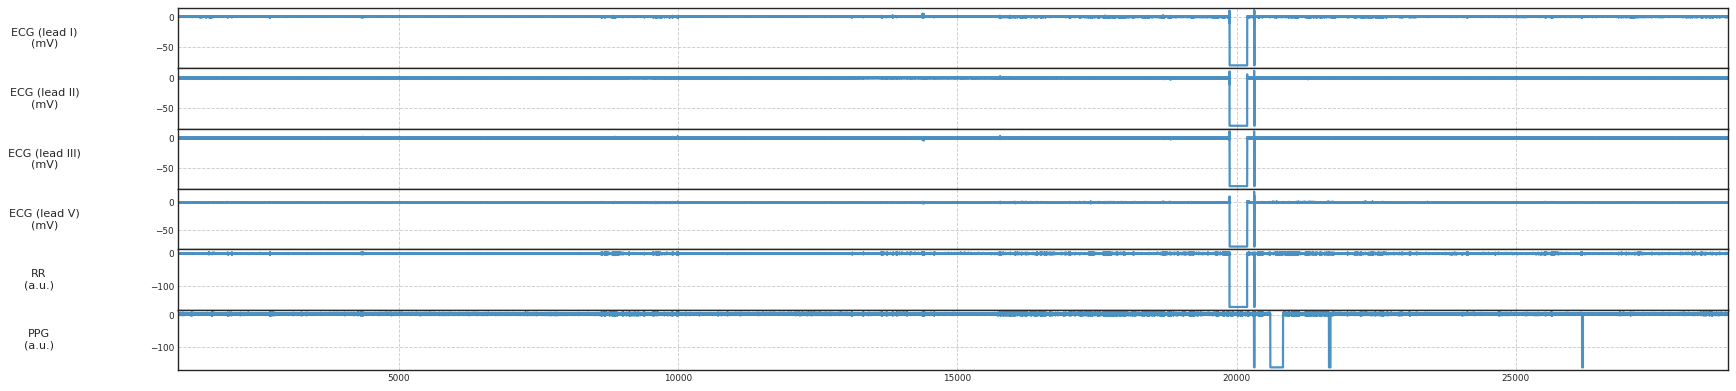

In [262]:
# def plot_all_sync(df_sub, subject_id, plt_scale=0.3, plotted_sigs=None, fig_name=None, outputdir=None, show_plot=False):

# if plotted_sigs is None:
#     plotted_sigs = PLOTTED_SIGS

#     subject_id = df['subject_id'].unique()[0]

t_start = 1000
t_end = 1050

df_seg = df[(df['time']>=t_start) & (df['time']>=t_end)].copy()

t_arr = df_seg['time'].values
#     t_arr = t_arr - t_arr[0]

t_start = t_arr[0]
t_end = t_arr[-1]

t_dur = t_arr[-1] - t_arr[0]
plt_scale = 0.5

fig, axes = plt.subplots(len(plotted_sigs), 1, figsize=(25,len(plotted_sigs)), gridspec_kw = {'wspace':0, 'hspace':0}, dpi=80)

# TODO: make a plot dict
fontsize = 20*plt_scale
linewidth = 2
alpha = 0.8

for i, ax in enumerate(axes):
    # condition grid
    ax.grid('on', linestyle='--')
    # no x ticks except for the bottom ax
    if i<len(axes)-1:
        ax.set_xticklabels([])
    # add y ticks to all axes
    ax.tick_params(axis='y', which='both', labelsize=20)

    sig_name = plotted_sigs[i]
    sig_plt = df_seg[sig_name].values

    # if sig_name in sync_color_dict.keys():
    #     color = color_dict[sync_color_dict[sig_name]]
    # else:
    #     color = random_colors[i]
    ax.plot(t_arr, sig_plt, alpha=alpha ,zorder=1, linewidth=linewidth)
    ax.set_xlim(t_start, t_end) # remove the weird white space at the beg and end of the plot


#     # remove some borders (top and right)
#     ax.spines['right'].set_visible(False)
#     if i==0:
#         ax.spines['top'].set_visible(False)

#     # add y label, indicate their unit
    if 'I' == sig_name or 'II' == sig_name or 'III' == sig_name or 'V' == sig_name:
        sig_title = 'ECG (lead {})'.format(sig_name)+ '\n({})'.format(unit_dict[sig_name])
    elif 'RR' == sig_name:
        sig_title = 'RR'+ '\n({})'.format('a.u.')
    elif 'SPO2' == sig_name:
        sig_title = 'PPG'+ '\n({})'.format('a.u.')
    elif 'AR1' == sig_name:
        sig_title = 'AR1'+ '\n({})'.format(unit_dict[sig_name])
    elif 'CVP3' == sig_name:
        sig_title = 'CVP3'+ '\n({})'.format(unit_dict[sig_name])
    elif 'CO2' == sig_name:
        sig_title = 'CO2'+ '\n({})'.format(unit_dict[sig_name])
    else:
        sig_title = 'a.u.'
        


    ax.set_ylabel(sig_title, fontsize=fontsize,rotation = 0,  va='center', ha='center',  labelpad=100)

    # set tick font size
    ax.tick_params(axis='both', which='major', labelsize=fontsize*0.8)

    # set a hard limit on the range of the signals
    # ylim_hard = False
    # if ylim_hard:
    #     if 'ECG' in sig_name:
    #         ax.set_ylim(-2, 2)    
    #     if 'ppg' in sig_name:
    #         ax.set_ylim(-500, 500)
    #     if 'accel' in sig_name:
    #         ax.set_ylim(-2, 2)
    #     if 'cosmed' in sig_name:
    #         ax.set_ylim(label_range_dict[sig_name.split('_')[0]])
    # if 'OUES' in sig_name:
    #     ax.set_ylim(0, 0.1)

#     # do this so there's no weird white space on top and bottom of each ax
#     y_min, y_max = ax.get_ylim()
#     ax.set_ylim(y_min, y_max)



#     # add color to each segment of all signal to indicate the task
#     inspect_labels(ax, df, y_min, y_max, annotate=i==0)

#     loc = plticker.MultipleLocator(base=600) # this locator puts ticks at regular intervals
#     ax.xaxis.set_major_locator(loc)

# ax.set_xlabel('time (sec)', fontsize=fontsize)
# fig.subplots_adjust(wspace=0, hspace=0)

# if outputdir is not None:
#     if not os.path.exists(outputdir):
#         os.makedirs(outputdir)
#     if fig_name is None:
#         fig_name = 'All_sub{}'.format(subject_id)
#     else:
#         fig_name = fig_name + '_sub{}'.format(subject_id)

#     fig.savefig(outputdir + fig_name,bbox_inches='tight', transparent=False)

# if show_plot == False:
#     plt.close(fig)
#     pyplot.close(fig)
#     plt.close('all')

In [263]:
from scipy.io import loadmat
import scipy
from scipy import signal
from scipy.fftpack import fft, ifft
from scipy.signal import hilbert, chirp
from scipy.signal import find_peaks
from scipy.interpolate import interp1d

import numpy as np

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_filter(btype, data, cutoff, fs, order=5):
    
    if btype == 'high': 
        b, a = butter_highpass(cutoff, fs, order=order)
        y = signal.filtfilt(b, a, data)
        return y
    elif btype == 'low': 
        b, a = butter_lowpass(cutoff, fs, order=order)
        y = signal.filtfilt(b, a, data)
        return y
    
def get_filt(sig_raw, Fs, lowcutoff=1, highcutoff=40):
    
    sig_filt = butter_filter('high', sig_raw, lowcutoff, Fs)
    sig_filt = butter_filter('low', sig_filt, highcutoff, Fs)

    return sig_filt

def get_padded_filt(sig_raw, filter_padded=5, lowcutoff=0.1, highcutoff=40, Fs=1000):
    
    offset = int(filter_padded*Fs) # reversely pad 10 sec to beginning and end of the signal
    sig_raw = np.r_[sig_raw[0:offset][::-1], sig_raw, sig_raw[-offset:][::-1]]
    sig_filt = get_filt(sig_raw, Fs, lowcutoff=lowcutoff, highcutoff=highcutoff)
    sig_filt = sig_filt[offset:-offset]
    
    return sig_filt


def get_padded_filt_DSwrapper(ts, sig, filter_padded, lowcutoff, highcutoff, Fs):
    downsample_factor = 5
    # ts = patch_dict['time']
    Fs_DS = Fs // downsample_factor # 100 Hz
    ts_DS = ts[::downsample_factor]

    sig_DS = np.interp(ts_DS, ts, sig)    
    sig_filt = get_padded_filt(sig_DS, filter_padded=filter_padded, lowcutoff=lowcutoff, highcutoff=highcutoff, Fs=Fs_DS)
    sig_filt = np.interp(ts, ts_DS, sig_filt) 
    
    return sig_filt


def moving_average(x, w):
#     return np.convolve(x, np.ones(w), 'valid') / w
    return np.convolve(x, np.ones(w), 'same') / w

# def my_ceil(arr, decimal=0):
#     return np.ceil(arr*(10**-decimal))/(10**-decimal)

# def my_floor(arr, decimal=0):
#     return np.floor(arr*(10**-decimal))/(10**-decimal)



def get_smooth(data, N=5):
    # padding prevent edge effect
    data_padded = np.pad(data, (N//2, N-1-N//2), mode='edge')
    data_smooth = np.convolve(data_padded, np.ones((N,))/N, mode='valid') 
    return data_smooth


def medfilt (x, k):
    """Apply a length-k median filter to a 1D array x.
    Boundaries are extended by repeating endpoints.
    """
    assert k % 2 == 1, "Median filter length must be odd."
    assert x.ndim == 1, "Input must be one-dimensional."
    k2 = (k - 1) // 2
    y = np.zeros ((len (x), k), dtype=x.dtype)
    y[:,k2] = x
    for i in range (k2):
        j = k2 - i
        y[j:,i] = x[:-j]
        y[:j,i] = x[0]
        y[:-j,-(i+1)] = x[j:]
        y[-j:,-(i+1)] = x[-1]
    return np.median (y, axis=1)

In [264]:
df_seg

,I,II,III,V,RR,SPO2,time
252000,-0.00976,-0.04392,-0.02196,-0.02928,0.095,4.360,1050.000000
252001,-0.01708,-0.04880,-0.02440,-0.02928,0.095,4.320,1050.004167
252002,-0.01464,-0.05368,-0.03660,-0.02684,0.095,4.320,1050.008333
252003,-0.00244,-0.06100,-0.05856,-0.02684,0.095,4.280,1050.012500
252004,0.00732,-0.06588,-0.07320,-0.02928,0.060,4.280,1050.016667
...,...,...,...,...,...,...,...
6911995,0.00000,0.08784,0.07320,-0.00732,-0.165,4.560,28799.979167
6911996,-0.04880,0.07564,0.11224,-0.00488,-0.185,4.690,28799.983333
6911997,-0.03904,0.10492,0.13664,0.00732,-0.185,4.825,28799.987500
6911998,0.01952,0.15860,0.13908,0.02928,-0.185,4.825,28799.991667


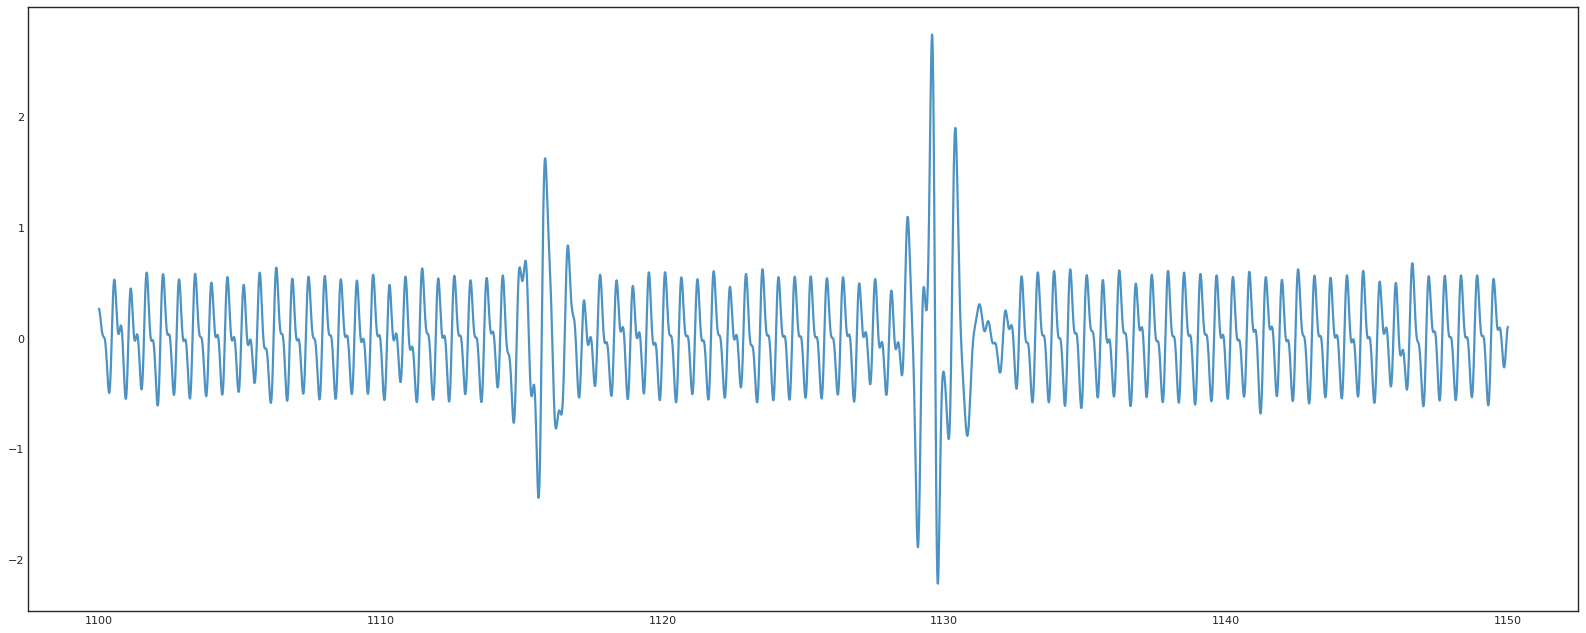

In [271]:
t_start = 1100
t_end = 1150

df_seg = df[(df['time']>=t_start) & (df['time']<=t_end)].copy()

t_arr = df_seg['time'].values
#     t_arr = t_arr - t_arr[0]

t_start = t_arr[0]
t_end = t_arr[-1]

sig_name = 'SPO2'
sig_plt = df_seg[sig_name].values


sig_plt = get_padded_filt(sig_plt, filter_padded=5, lowcutoff=1, highcutoff=4, Fs=Fs)

# t_arr = df_seg['time'].values

fig, ax = plt.subplots(1, 1, figsize=(25,10), gridspec_kw = {'wspace':0, 'hspace':0}, dpi=80)
ax.plot(t_arr, sig_plt, alpha=alpha ,zorder=1, linewidth=linewidth)
# ax.set_ylim(-5,5)

In [266]:
unit_dict

{'I': 'mV', 'II': 'mV', 'III': 'mV', 'V': 'mV', 'RR': '', 'SPO2': ''}

In [3]:
homedir = os.path.expanduser('~')+'/'

In [4]:
inputdir = homedir+'kamaleswaranlab/Sepsis3_062321/Files_cp_sftp_6_30_21/Files_cp_6_30_21/'

In [5]:
for sub_file in os.listdir(inputdir):
    # print(sub_file)
    pass

In [6]:
sub_id = 'A071-0512777549'

In [7]:
for sub_file in os.listdir(inputdir+sub_id):
    if 'hea' in sub_file:
        print(sub_file)

A071-0512777549.hea
A071-0512777549_0000.hea
A071-0512777549_0001.hea
A071-0512777549_0002.hea
A071-0512777549_0003.hea
A071-0512777549_0004.hea
A071-0512777549_0005.hea
A071-0512777549_0006.hea
A071-0512777549_0007.hea
A071-0512777549_0008.hea
A071-0512777549_0009.hea
A071-0512777549_0010.hea
A071-0512777549_0n.hea
A071-0512777549_layout.hea


In [22]:
inputdir_sub = inputdir + sub_id + '/'

inputdir_sub

'/home/mchan82/kamaleswaranlab/Sepsis3_062321/Files_cp_sftp_6_30_21/Files_cp_6_30_21/A071-0512777549/'

In [ ]:
header_name = 'A071-0512777549_0n.hea'

headerdir = inputdir_sub+header_name

headerdir

with open(headerdir, 'r') as f:
    header = f.readlines()

header[1].split[' ']

In [ ]:
data = loadmat(file_dir)


In [7]:
VentPat

,index,pat_id,csn,recorded_time,vent_start_time,vent_stop_time,vent_type,vent_mode,vent_rate_set,vent_tidal_rate_set,vent_tidal_rate_exhaled,peep,fio2
0,11,20627087,10003290267,09/23/2020 11:30:00,09/23/2020 11:30:00,09/23/2020 11:30:00,PB 840,AC/CMV Volume,16,450,435,8,1.0
1,20,20641845,10007160147,05/27/2020 21:25:00,05/27/2020 21:25:00,05/28/2020 04:38:00,Hamilton C3,AC/CMV Volume,32,450,447,6,0.50
2,22,20641845,10007160147,05/27/2020 23:03:00,05/27/2020 21:25:00,05/28/2020 04:38:00,Hamilton C3,AC/CMV Volume,20,450,370,6,0.30
3,23,20641845,10007160147,05/28/2020 04:38:00,05/27/2020 21:25:00,05/28/2020 04:38:00,Hamilton C3,AC/CMV Volume,14,400,439,6,0.30
4,26,20676962,10016830310,11/13/2020 13:32:00,11/13/2020 13:32:00,11/14/2020 08:02:00,PB 840,AC/CMV Volume,14,400,427,6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94144,320060,20608492,9999340155,09/12/2020 12:16:00,07/16/2020 23:19:00,09/17/2020 15:49:00,Hamilton C3,AC/CMV Volume,20,500,526,8,0.4
94145,320061,20608492,9999340155,09/12/2020 16:45:00,07/16/2020 23:19:00,09/17/2020 15:49:00,Hamilton C3,AC/CMV Volume,20,500,503,8,0.4
94146,320062,20608492,9999340155,09/12/2020 19:51:00,07/16/2020 23:19:00,09/17/2020 15:49:00,Hamilton C3,AC/CMV Volume,20,500,444,8,0.4
94147,320063,20608492,9999340155,09/13/2020 05:35:00,07/16/2020 23:19:00,09/17/2020 15:49:00,Hamilton C3,AC/CMV Volume,20,500,431,8,0.4


In [2]:
years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020']
peepMerged = pd.DataFrame()
Sep_Vent_Pat_dur_Merged = pd.DataFrame()
Sep_Pat_file = pd.read_csv('/labs/kamaleswaranlab/MODS/cemars4/ARDS/Sep_Loc_Pat_ID_1_5_22.csv')
Sep_Pat_file['pat_id'] = Sep_Pat_file['PAT_ID']
count=0
for year in years:
    ventFilePath = '/labs/kamaleswaranlab/MODS/Data/Emory_Data/em_data/'+str(year)+'/CJSEPSIS_VENT_'+str(year)+'.dsv'
    if not os.path.isfile(ventFilePath):
        print(f"Not in the path: {ventFilePath}")
        break
    else:
#         print(f"found {ventFilePath}")
        
        VentPat = pd.read_csv(ventFilePath, sep='|').dropna().reset_index()
        #count+=len(list(pd.unique(peepFiltered['csn'])))
        
        Sep_Vent_Pat = Sep_Pat_file.merge(VentPat,on='pat_id')
        Sep_Vent_Pat_af = Sep_Vent_Pat[Sep_Vent_Pat['BED_LOCATION_START']<=Sep_Vent_Pat['recorded_time']]
        Sep_Vent_Pat_dur = Sep_Vent_Pat_af[Sep_Vent_Pat_af['BED_LOCATION_END']>=Sep_Vent_Pat_af['recorded_time']]
        Sep_Vent_Pat_dur['year'] = year
        Sep_Vent_Pat_dur_Merged = pd.concat([Sep_Vent_Pat_dur_Merged, Sep_Vent_Pat_dur], axis=0)
        #peepFiltered['peep'] = pd.to_numeric(peepFiltered['peep'], errors='coerce')
        #peepFiltered = peepFiltered[pd.to_numeric(peepFiltered['peep'])>=5][['pat_id', 'csn','peep', 'recorded_time', 'fio2']]
        #peepFiltered['year'] = year
        #peepMerged = pd.concat([peepMerged, peepFiltered], axis=0)
        
#print(f'No of total encounters in the vent files={count}')        


/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,8,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarnin

# Extracting data for all patients with peep>5 and p/f<300 or s/f<315:

In [21]:
patient_enc_dict['vitals_staging'].columns

Index(['temperature', 'daily_weight_kg', 'height_cm', 'sbp_line', 'dbp_line',
       'map_line', 'sbp_cuff', 'dbp_cuff', 'map_cuff', 'pulse',
       'unassisted_resp_rate', 'spo2', 'end_tidal_co2', 'o2_flow_rate'],
      dtype='object')

In [23]:
patient_enc_dict['vitals_staging'][['spo2']]

,spo2
2014-06-13 07:42:00,94.400000
2014-06-13 08:42:00,96.000000
2014-06-13 09:42:00,94.000000
2014-06-13 10:42:00,94.000000
2014-06-13 11:42:00,96.400000
2014-06-13 12:42:00,97.000000
2014-06-13 13:42:00,97.000000
2014-06-13 14:42:00,97.000000
2014-06-13 15:42:00,93.000000
2014-06-13 16:42:00,92.000000


In [20]:
patient_enc_dict['labs_staging'].columns

Index(['anion_gap', 'base_excess', 'bicarb_(hco3)',
       'blood_urea_nitrogen_(bun)', 'calcium', 'calcium_adjusted',
       'calcium_ionized', 'chloride', 'creatinine', 'gfr', 'glucose',
       'magnesium', 'osmolarity', 'phosphorus', 'potassium', 'sodium',
       'haptoglobin', 'hematocrit', 'hemoglobin', 'met_hgb', 'platelets',
       'white_blood_cell_count', 'carboxy_hgb',
       'alanine_aminotransferase_(alt)', 'albumin', 'alkaline_phosphatase',
       'ammonia', 'aspartate_aminotransferase_(ast)', 'bilirubin_direct',
       'bilirubin_total', 'fibrinogen', 'inr', 'lactate_dehydrogenase',
       'lactic_acid', 'partial_prothrombin_time_(ptt)', 'prealbumin',
       'protein', 'prothrombin_time_(pt)', 'thrombin_time', 'transferrin',
       'amylase', 'lipase', 'b-type_natriuretic_peptide_(bnp)', 'troponin',
       'fio2', 'partial_pressure_of_carbon_dioxide_(paco2)',
       'partial_pressure_of_oxygen_(pao2)', 'ph',
       'saturation_of_oxygen_(sao2)', 'd_dimer', 'hemoglobin_a1c

In [22]:
patient_enc_dict['labs_staging'][['saturation_of_oxygen_(sao2)', 'partial_pressure_of_oxygen_(pao2)']]

,saturation_of_oxygen_(sao2),partial_pressure_of_oxygen_(pao2)
2014-06-13 07:42:00,NaN,NaN
2014-06-13 08:42:00,NaN,NaN
2014-06-13 09:42:00,NaN,NaN
2014-06-13 10:42:00,NaN,NaN
2014-06-13 11:42:00,NaN,NaN
2014-06-13 12:42:00,NaN,NaN
2014-06-13 13:42:00,NaN,NaN
2014-06-13 14:42:00,NaN,NaN
2014-06-13 15:42:00,NaN,NaN
2014-06-13 16:42:00,NaN,NaN


In [38]:
year, csn

('2014', 10907164065)

# get SpO2 and SaO2

In [66]:
csns = list(pd.unique(Sep_Vent_Pat_dur_Merged['csn']))
print(f'Number of patients/beds with Sepsis = {len(csns)}')
count=0
countARDS=0
df_merged = []


merged2 = pd.DataFrame()
ARDS_TS = pd.DataFrame(columns=['csn','ARDS_TS'])
for csn in csns:
    year = pd.unique(Sep_Vent_Pat_dur_Merged[Sep_Vent_Pat_dur_Merged['csn']==csn]['year'].values[0])[0]
    pkl_path = '/labs/kamaleswaranlab/MODS/Encounter_Pickles/em/'+year+'/'+str(csn)+'.pickle'
    # print(pkl_path)
    if not os.path.isfile(pkl_path):
#         print(f"Not in the path: {pkl_path}")
        count+=1
#         break
    else:
        # print(f"found {pkl_path}")
    
        with open(pkl_path, 'rb') as pf:
            patient_enc_dict = pickle.load(pf)
            
        df1 = patient_enc_dict['vitals_staging'][['spo2']].copy()
        df2 = patient_enc_dict['labs_staging'][['saturation_of_oxygen_(sao2)', 'partial_pressure_of_oxygen_(pao2)']].copy()

        df_12 = pd.concat([df1, df2], axis=1).dropna()
        
        if df_12.shape[0]!=0:
            df_12['year'] = year
            df_12['csn'] = csn
            df_merged.append(df_12.copy())
            
df_merged = pd.concat(df_merged)[['spo2', 'saturation_of_oxygen_(sao2)', 'year', 'csn']]
df_merged = aaa.rename(columns={"spo2": "SpO2", "saturation_of_oxygen_(sao2)": "SaO2"})

print('Done!')

Number of patients/beds with Sepsis = 2804
Done!


In [67]:
print(df_merged.shape)

(2264, 2)


In [68]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
matplotlib.rc( 'savefig', facecolor = 'white' )
from matplotlib import pyplot
from matplotlib import colors

import matplotlib.ticker as plticker


(70, 100)

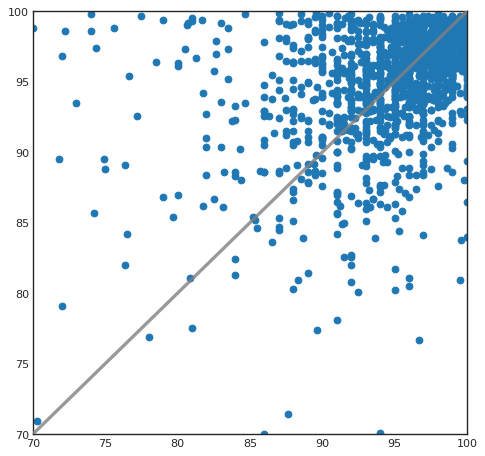

In [69]:

fig, ax = plt.subplots(1,1, figsize=(7, 7), dpi=80, facecolor='white')

ax.scatter(df_merged['SpO2'].values, df_merged['SaO2'].values)

ax.plot( [70,100],[70,100] , linewidth=3, color='gray', alpha=0.8, zorder=3)
ax.set_xlim([70,100])
ax.set_ylim([70,100])

In [27]:
df_merged = pd.concat([df1, df2], axis=1).dropna()


In [32]:
df_merged

,spo2,saturation_of_oxygen_(sao2),partial_pressure_of_oxygen_(pao2)


In [10]:
csns = list(pd.unique(Sep_Vent_Pat_dur_Merged['csn']))
print(f'Number of patients/beds with Sepsis = {len(csns)}')
count=0
countARDS=0
merged2 = pd.DataFrame()
ARDS_TS = pd.DataFrame(columns=['csn','ARDS_TS'])
for csn in csns:
    year = pd.unique(Sep_Vent_Pat_dur_Merged[Sep_Vent_Pat_dur_Merged['csn']==csn]['year'].values[0])[0]
    pkl_path = '/labs/kamaleswaranlab/MODS/Encounter_Pickles/em/'+year+'/'+str(csn)+'.pickle'
    # print(pkl_path)
    if not os.path.isfile(pkl_path):
#         print(f"Not in the path: {pkl_path}")
        count+=1
#         break
    else:
        # print(f"found {pkl_path}")
    
        with open(pkl_path, 'rb') as pf:
            patient_enc_dict = pickle.load(pf)
        super_table = patient_enc_dict['super_table']
        
        sys.exit()

        if len(super_table[super_table['pf_pa']<=300])>0:
            countARDS+=1
            ARDS_ts = super_table[super_table['pf_pa']<=300].index[0].strftime("%m/%d/%Y, %H:%M:%S")
            ARDS_TS=ARDS_TS.append({'csn': csn,'ARDS_TS':ARDS_ts}, ignore_index=True)
        #super_table1 = super_table[super_table['pf_pa']<300]
        #super_table1.index[0]
        # print(patient_enc_dict.keys())
        # print(patient_enc_dict['abx_order_time'])
        # # # print(patient_enc_dict['static_features']['age'])
        # # # print(patient_enc_dict['labs_staging'])
        # # print(patient_enc_dict['vitals_staging'][['temperature','map_line','map_cuff','pulse','unassisted_resp_rate', 'spo2', 'end_tidal_co2', 'o2_flow_rate']])
        # import sys
        # sys.exit()
        
        #icd10=patient_enc_dict['diagnosis_PerCSN']['dx_code_icd10'].values
        #icd9=patient_enc_dict['diagnosis_PerCSN']['dx_code_icd9'].values

        #if any('518' in code for code in icd9) or 'J80' in icd10:
            #super_table = patient_enc_dict['super_table']
            #super_table1 = super_table[super_table['pf_pa']<300]
            #super_table2=super_table[super_table['pf_sp']<=315]
            #super_table = pd.concat([super_table1, super_table2], axis=0)
            #super_table = super_table.drop_duplicates()
            #super_table['csn'] = csn
            
            # super_table = pd.concat([super_table, patient_enc_dict['vent_status']], axis=1)
            # print(super_table)
            # import sys
            # sys.exit()
            # labs = patient_enc_dict['labs_staging'][['anion_gap','lactate_dehydrogenase','bicarb_(hco3)','blood_urea_nitrogen_(bun)','glucose','hematocrit','albumin','bilirubin_direct','fio2', 'partial_pressure_of_carbon_dioxide_(paco2)','partial_pressure_of_oxygen_(pao2)', 'ph','saturation_of_oxygen_(sao2)','bilirubin_total', 'calcium', 'calcium_adjusted','calcium_ionized', 'chloride','phosphorus', 'potassium', 'sodium','hemoglobin','white_blood_cell_count', 'carboxy_hgb','creatinine']]
            # vitals = patient_enc_dict['vitals_staging'][['temperature','map_line','map_cuff','sbp_line','sbp_cuff','pulse','unassisted_resp_rate', 'spo2', 'end_tidal_co2', 'o2_flow_rate']]
            
            # all_measures = pd.concat([labs, vitals], axis=1)
            #merged2 = pd.concat([merged2, super_table], axis = 0)
        #else:
            #continue
        
#print(merged2)

#merged2.to_csv('eARDSData.csv')

#print(f'Number of patients with s/f<=315 and p/f<300 = {len(list(pd.unique(merged2["csn"])))}')
#print(f'Number of encounters not found in the encounter pickles: {count}')



Number of patients/beds with Sepsis = 2804


SystemExit: 

/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2969: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [3]:
countARDS

NameError: name 'countARDS' is not defined

In [6]:
ARDS_ts

'07/29/2019, 00:12:04'

In [5]:
ARDS_TS

,csn,ARDS_TS
0,3507474226,"08/27/2014, 10:47:00"
1,4038504074,"03/15/2014, 20:13:10"
2,45660724103,"06/07/2014, 21:52:00"
3,7683234230,"09/16/2014, 16:19:00"
4,4387424019,"01/20/2014, 00:21:05"
...,...,...
2088,57735529284,"10/11/2019, 20:52:00"
2089,57751399297,"10/24/2019, 13:09:04"
2090,57845139057,"03/06/2019, 04:33:54"
2091,57982189346,"12/23/2019, 10:59:00"


In [7]:
Sep_Pat_file.columns

Index(['PAT_ID', 'BED_LOCATION_START', 'BED_LOCATION_END', 'TSEPSIS',
       'deBedTime', 'pat_id'],
      dtype='object')

In [8]:
Sep_Vent_Pat_dur.columns

Index(['PAT_ID', 'BED_LOCATION_START', 'BED_LOCATION_END', 'TSEPSIS',
       'deBedTime', 'pat_id', 'index', 'csn', 'recorded_time',
       'vent_start_time', 'vent_stop_time', 'vent_type', 'vent_mode',
       'vent_rate_set', 'vent_tidal_rate_set', 'vent_tidal_rate_exhaled',
       'peep', 'fio2', 'year'],
      dtype='object')

In [9]:
Sep_Vent_Pat_dur.head()

,PAT_ID,BED_LOCATION_START,BED_LOCATION_END,TSEPSIS,deBedTime,pat_id,index,csn,recorded_time,vent_start_time,vent_stop_time,vent_type,vent_mode,vent_rate_set,vent_tidal_rate_set,vent_tidal_rate_exhaled,peep,fio2,year
469,100242766,03/03/2020 20:46:08,03/08/2020 15:09:01,2010-03-30 16:45:00,A140-0583286241,100242766,152166,58483030054,03/03/2020 21:50:00,03/03/2020 21:50:00,03/08/2020 20:37:00,Hamilton C3,AC/CMV Volume,24,410,438,6,1.0,2020
470,100242766,03/03/2020 20:46:08,03/08/2020 15:09:01,2010-03-30 16:45:00,A140-0583286241,100242766,152169,58483030054,03/04/2020 00:57:00,03/03/2020 21:50:00,03/08/2020 20:37:00,Hamilton C3,AC/CMV Volume,35,410,400,12,0.80,2020
471,100242766,03/03/2020 20:46:08,03/08/2020 15:09:01,2010-03-30 16:45:00,A140-0583286241,100242766,152172,58483030054,03/04/2020 04:11:00,03/03/2020 21:50:00,03/08/2020 20:37:00,Hamilton C3,AC/CMV Volume,35,410,400,12,0.75,2020
472,100242766,03/03/2020 20:46:08,03/08/2020 15:09:01,2010-03-30 16:45:00,A140-0583286241,100242766,152174,58483030054,03/04/2020 08:08:00,03/03/2020 21:50:00,03/08/2020 20:37:00,Hamilton C3,AC/CMV Volume,35,450,434,12,0.7,2020
473,100242766,03/03/2020 20:46:08,03/08/2020 15:09:01,2010-03-30 16:45:00,A140-0583286241,100242766,152175,58483030054,03/04/2020 11:38:00,03/03/2020 21:50:00,03/08/2020 20:37:00,Hamilton C3,AC/CMV Volume,35,450,436,12,0.7,2020


In [10]:
Sep_ARDS_deBedTime = ARDS_TS.merge(Sep_Vent_Pat_dur_Merged,on='csn')
Sep_ARDS_deBedTime1 = Sep_ARDS_deBedTime[Sep_ARDS_deBedTime['BED_LOCATION_START']<=Sep_ARDS_deBedTime['ARDS_TS']]
Sep_ARDS_deBedTime2 = Sep_ARDS_deBedTime1[Sep_ARDS_deBedTime1['BED_LOCATION_END']>=Sep_ARDS_deBedTime1['ARDS_TS']]
Sep_ARDS_deBedTime3 = Sep_ARDS_deBedTime2[['deBedTime','BED_LOCATION_START','BED_LOCATION_END','TSEPSIS','ARDS_TS','vent_start_time']]
Sep_ARDS_deBedTime4 = Sep_ARDS_deBedTime3.drop_duplicates()
Sep_ARDS_deBedTime4

,deBedTime,BED_LOCATION_START,BED_LOCATION_END,TSEPSIS,ARDS_TS,vent_start_time
10,A050-0394924561,03/15/2014 19:00:00,03/19/2014 15:00:21,2004-04-11 06:16:00,"03/15/2014, 20:13:10",03/15/2014 21:10:00
18,A091-0409349409,09/16/2014 16:22:25,09/17/2014 04:21:00,2004-10-12 20:16:00,"09/16/2014, 16:19:00",08/29/2014 18:15:00
19,A014-0410899065,09/16/2014 16:22:25,09/17/2014 04:21:00,2004-10-12 20:16:00,"09/16/2014, 16:19:00",08/29/2014 18:15:00
21,A050-0390197026,01/20/2014 00:49:18,01/23/2014 18:21:48,2004-02-18 06:26:00,"01/20/2014, 00:21:05",01/19/2014 23:38:00
46,A014-0407529610,08/08/2014 16:27:24,08/11/2014 15:36:00,2004-09-03 16:30:00,"08/08/2014, 16:48:33",08/08/2014 16:30:00
...,...,...,...,...,...,...
90533,A090-0551197615,03/06/2019 00:57:48,03/18/2019 16:45:00,2009-04-02 15:01:00,"03/06/2019, 04:33:54",03/07/2019 17:00:00
90576,A062-0551851966,03/06/2019 00:57:48,03/18/2019 16:45:00,2009-04-02 15:01:00,"03/06/2019, 04:33:54",03/07/2019 17:00:00
90622,A138-0577157125,12/23/2019 23:47:26,12/30/2019 16:55:31,2010-01-18 14:13:00,"12/23/2019, 10:59:00",12/23/2019 12:25:00
90650,A006-0564362063,07/28/2019 21:03:41,08/31/2019 01:44:59,2009-08-24 01:32:00,"07/29/2019, 00:12:04",07/28/2019 20:40:00


In [12]:
print(len(Sep_ARDS_deBedTime4[(pd.to_datetime(Sep_ARDS_deBedTime4['ARDS_TS']) - timedelta(hours=6))>=pd.to_datetime(Sep_ARDS_deBedTime4['vent_start_time'])]))

485


In [34]:
pd.to_datetime(Sep_ARDS_deBedTime4['ARDS_TS']) + timedelta(hours=6)

10      2014-03-16 02:13:10
18      2014-09-16 22:19:00
19      2014-09-16 22:19:00
21      2014-01-20 06:21:05
46      2014-08-08 22:48:33
                ...        
90533   2019-03-06 10:33:54
90576   2019-03-06 10:33:54
90622   2019-12-23 16:59:00
90650   2019-07-29 06:12:04
90653   2019-07-29 06:12:04
Name: ARDS_TS, Length: 2703, dtype: datetime64[ns]

In [9]:
Sep_Vent_Pat_dur_Merged.columns

Index(['PAT_ID', 'BED_LOCATION_START', 'BED_LOCATION_END', 'TSEPSIS',
       'deBedTime', 'pat_id', 'index', 'csn', 'recorded_time',
       'vent_start_time', 'vent_stop_time', 'vent_type', 'vent_mode',
       'vent_rate_set', 'vent_tidal_rate_set', 'vent_tidal_rate_exhaled',
       'peep', 'fio2'],
      dtype='object')

In [14]:
patient_enc_dict.columns

AttributeError: 'dict' object has no attribute 'columns'

In [8]:
print(len(super_table))
super_table['pf_pa']

1941


2019-07-28 20:12:04      NaN
2019-07-28 21:12:04      NaN
2019-07-28 22:12:04      NaN
2019-07-28 23:12:04      NaN
2019-07-29 00:12:04    256.0
                       ...  
2019-10-17 12:12:04      NaN
2019-10-17 13:12:04      NaN
2019-10-17 14:12:04      NaN
2019-10-17 15:12:04      NaN
2019-10-17 16:12:04      NaN
Freq: H, Name: pf_pa, Length: 1941, dtype: float64

In [10]:
super_table1['pf_pa'][0:5]

2019-07-29 00:12:04    256.0
2019-07-29 01:12:04    256.0
2019-07-29 02:12:04    256.0
2019-07-29 03:12:04    256.0
2019-07-29 04:12:04    256.0
Name: pf_pa, dtype: float64

In [14]:
super_table1.index[0]

Timestamp('2019-07-29 00:12:04')

In [18]:
super_table[super_table['pf_pa']<=300].index[0].strftime("%m/%d/%Y, %H:%M:%S")

'07/29/2019, 00:12:04'

In [21]:
len(super_table[super_table['pf_pa']<=300])

0